In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
img = Image.open('my_sample.png')
with open('my_sample.geojson', 'r') as f:
    data = json.load(f)

0.00010754653580136164 -0.00011830118938505052
0.0001088117891612228 -0.00011513805597473947
0.00012209694946818672 -0.00010311814903474215
0.00012526008288205048 -9.552662886136432e-05
0.00010944441585536424 -0.00011956644274491168
0.00011703593602874207 -9.679188222477819e-05
9.995501562798381e-05 -0.00013411685641173676
0.00013917786985473413 -0.00014360625662845905


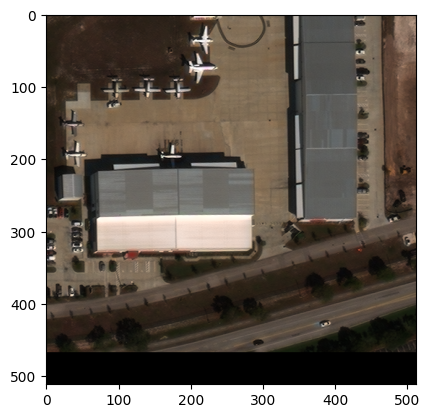

In [29]:
fig, ax = plt.subplots(1)
ax.imshow(img)
for feature in data['features']:
    coords = feature['geometry']['coordinates'][0]
    xs = [point[0] for point in coords]
    ys = [point[1] for point in coords]
    x_min = min(xs)
    x_max = max(xs)
    y_min = min(ys)
    y_max = max(ys)
    w = x_max-x_min
    h = y_min-y_max
    print(w, h)
    rect = patches.Rectangle((x_min, y_min), w, h, linewidth=2, edgecolor='r')
    
    ax.add_patch(rect)
plt.show()

In [40]:
data['features']

[{'type': 'Feature',
  'properties': {'loc_id': 113,
   'cat_id': '10400100460EF400',
   'location': 'Pompano Beach Airpark, NE 5th Ave, Pompano Beach, Broward County, Florida, 33060:33064, USA',
   'role': 'Small Civil Transport/Utility',
   'role_id': 1,
   'is_plane': 1,
   'num_engines': 1,
   'propulsion': 'propeller',
   'canards': 'no',
   'num_tail_fins': 1,
   'wing_position': 'mid/low mounted',
   'wing_type': 'straight',
   'length': 10.760387367215543,
   'wingspan': 13.105243199545304,
   'area': 70.29477160531579,
   'faa_wingspan_class': 1,
   'Public_Train': 1,
   'Public_Test': 0,
   'partialDec': 1.0,
   'truncated': 0,
   'new_area': 70.29477160531579},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-80.11745713909099, 26.24195819324593],
     [-80.11749509669187, 26.24189999159126],
     [-80.11756468562679, 26.24196388688606],
     [-80.11749762719859, 26.242018292780646],
     [-80.11745713909099, 26.24195819324593]]]}},
 {'type': 'Feature',
  'properties'

In [27]:
data['features'][0]['geometry']['coordinates'][0]

[[-80.11745713909099, 26.24195819324593],
 [-80.11749509669187, 26.24189999159126],
 [-80.11756468562679, 26.24196388688606],
 [-80.11749762719859, 26.242018292780646],
 [-80.11745713909099, 26.24195819324593]]

In [30]:
with open('RarePlanes_Train_Coco_Annotations_tiled.json', 'r') as f:
    metadata = json.load(f)

In [44]:
metadata['images']

[{'id': 1,
  'file_name': '4_1040010019345B00_tile_821.png',
  'width': 512,
  'height': 512},
 {'id': 2,
  'file_name': '44_104001004337F600_tile_48.png',
  'width': 512,
  'height': 512},
 {'id': 3,
  'file_name': '54_104001003D4C9C00_tile_261.png',
  'width': 512,
  'height': 512},
 {'id': 4,
  'file_name': '59_104001001DC7F200_tile_1085.png',
  'width': 512,
  'height': 512},
 {'id': 5,
  'file_name': '125_10400100363EC000_tile_168.png',
  'width': 512,
  'height': 512},
 {'id': 6,
  'file_name': '42_10400100055EA300_tile_883.png',
  'width': 512,
  'height': 512},
 {'id': 7,
  'file_name': '23_104001002E8B7900_tile_1099.png',
  'width': 512,
  'height': 512},
 {'id': 8,
  'file_name': '42_10400100055EA300_tile_342.png',
  'width': 512,
  'height': 512},
 {'id': 9,
  'file_name': '92_1040010041354E00_tile_378.png',
  'width': 512,
  'height': 512},
 {'id': 10,
  'file_name': '86_10400100290F5300_tile_37.png',
  'width': 512,
  'height': 512},
 {'id': 11,
  'file_name': '128_1040010

In [47]:
df_img = pd.DataFrame(metadata['images'])
df_ann = pd.DataFrame(metadata['annotations'])

In [49]:
df_img.info()

<class 'pandas.DataFrame'>
RangeIndex: 5815 entries, 0 to 5814
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         5815 non-null   int64
 1   file_name  5815 non-null   str  
 2   width      5815 non-null   int64
 3   height     5815 non-null   int64
dtypes: int64(3), str(1)
memory usage: 181.8 KB


In [67]:
img_id = df_img.loc[df_img['file_name']=='113_10400100460EF400_tile_35.png'].iloc[0]['id']

In [68]:
img_id

np.int64(3528)

In [76]:
anns = df_ann[df_ann['image_id']==img_id]

In [77]:
df_ann[df_ann['image_id']==img_id]

,segmentation,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,...,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,image_id,area_pixels,bbox,id
5877,"[[52.993327368050814, 152.78992417827249, 41.9...",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Small Civil Transport/Utility,1.0,1.0,1.0,propeller,no,...,1.0,1.0,0.0,1.0,0.0,70.294772,3528,537.815599,"[21.705068487673998, 135.30530892219394, 31.28...",5878
5878,"[[56.490250416100025, 194.93704937491566, 46.7...",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Small Civil Transport/Utility,1.0,1.0,1.0,propeller,no,...,1.0,1.0,0.0,1.0,0.0,69.205702,3528,529.482625,"[24.83389437571168, 178.55672560911626, 31.656...",5879
5879,"[[97.71713270619512, 118.92498515546322, 79.49...",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Small Civil Transport/Utility,1.0,1.0,1.0,propeller,no,...,1.0,1.0,0.0,1.0,0.0,69.641639,3528,532.819202,"[79.49632312357426, 88.92506634723395, 35.5213...",5880
5880,"[[141.33664655312896, 116.53235359489918, 122....",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Small Civil Transport/Utility,1.0,1.0,1.0,propeller,no,...,1.0,1.0,0.0,1.0,0.0,66.263496,3528,506.973431,"[122.37964264675975, 88.74101776629686, 36.441...",5881
5881,"[[189.18927778676152, 196.9615837726742, 178.3...",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Small Civil Transport/Utility,1.0,1.0,1.0,propeller,no,...,1.0,1.0,0.0,1.0,0.0,72.378000,3528,553.753260,"[157.3488731570542, 180.7653085887432, 31.8404...",5882
5882,"[[183.4837717525661, 116.71640217769891, 164.8...",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Small Civil Transport/Utility,1.0,1.0,1.0,propeller,no,...,1.0,1.0,0.0,1.0,0.0,62.659553,3528,479.400092,"[164.89486500620842, 88.5569691862911, 34.0489...",5883
5883,"[[231.8885487243533, 36.65526916272938, 223.97...",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Small Civil Transport/Utility,1.0,1.0,2.0,propeller,no,...,1.0,1.0,0.0,1.0,0.0,74.115441,3528,567.048758,"[202.80887282639742, 16.409925181418657, 29.07...",5884
5884,"[[238.3302490822971, 74.01713123731315, 211.27...",113.0,10400100460EF400,"Pompano Beach Airpark, NE 5th Ave, Pompano Bea...",Medium Civil Transport/Utility,2.0,1.0,2.0,jet,no,...,2.0,1.0,0.0,1.0,0.0,110.518019,3528,845.559803,"[197.83956112340093, 53.955835837870836, 40.49...",5885


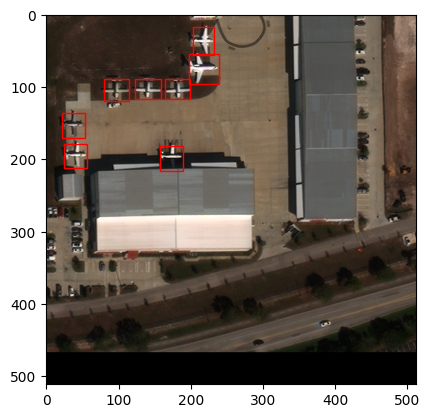

In [79]:
fig, ax = plt.subplots(1)
ax.imshow(img)
for _, ann in anns.iterrows():
    x, y, w, h  = ann['bbox']
    rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()